<a href="https://colab.research.google.com/github/VasylDvorakDS/Digitals-classifier-with-ANN/blob/master/Digitals_classifier_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


In [ ]:


# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)





11490434/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)




Downloading data from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz
11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)



In [ ]:


# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])



In [ ]:


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:


# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)



Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2984 - accuracy: 0.9136 - val_loss: 0.1402 - val_accuracy: 0.9600
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1416 - accuracy: 0.9584 - val_loss: 0.0966 - val_accuracy: 0.9715
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1064 - accuracy: 0.9672 - val_loss: 0.0868 - val_accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0866 - accuracy: 0.9733 - val_loss: 0.0816 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0749 - accuracy: 0.9766 - val_loss: 0.0732 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0640 - accuracy: 0.9798 - val_loss: 0.0711 - val_accuracy: 0.9772
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0564 - accuracy: 0.9817 - val_loss: 0.0676 - val_accuracy:

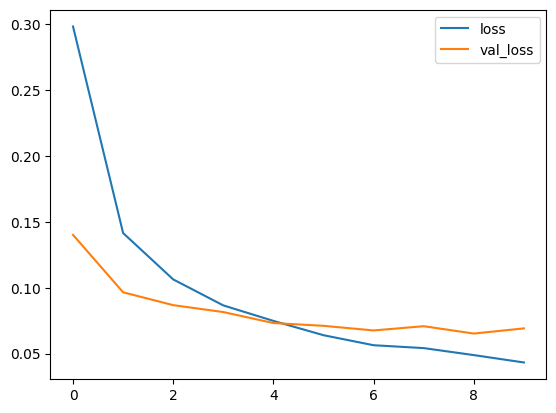

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

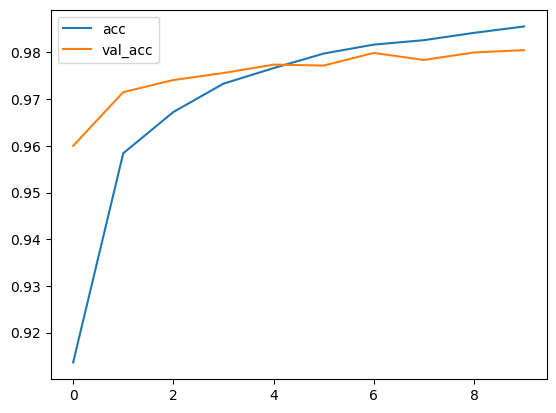

In [ ]:


# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()



In [ ]:


# Evaluate the model
print(model.evaluate(x_test, y_test))



313/313 [==============================] - 1s 2ms/step - loss: 0.0692 - accuracy: 0.9805
[0.06917396932840347, 0.9804999828338623]


313/313 [==============================] - 1s 1ms/step
Confusion matrix, without normalization
[[ 972    0    0    1    0    1    3    1    2    0]
 [   0 1125    3    1    0    1    2    0    3    0]
 [   2    2 1011    1    4    0    0    6    6    0]
 [   0    0    1  992    0    5    0    6    4    2]
 [   0    0    2    0  965    1    4    1    0    9]
 [   2    0    0    5    1  880    1    0    2    1]
 [   5    3    0    1    2    9  935    0    3    0]
 [   3    6    8    3    1    1    0 1000    1    5]
 [   1    0    5    4    2    3    0    4  953    2]
 [   1    3    0    9   11    5    0    4    4  972]]


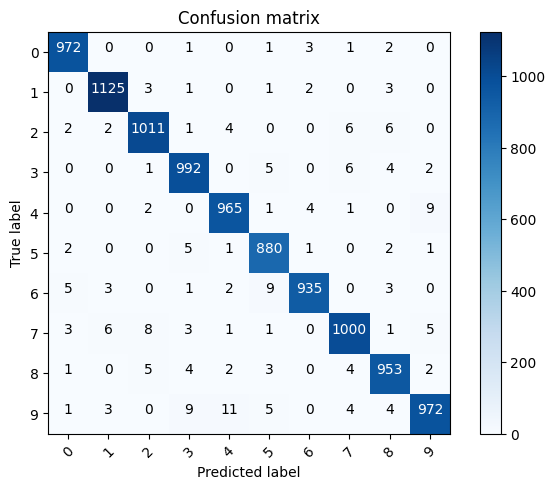

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

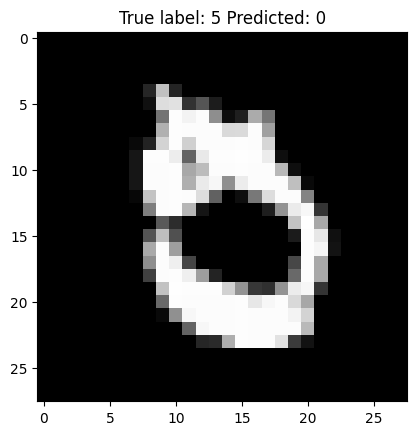

In [ ]:


# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

